In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

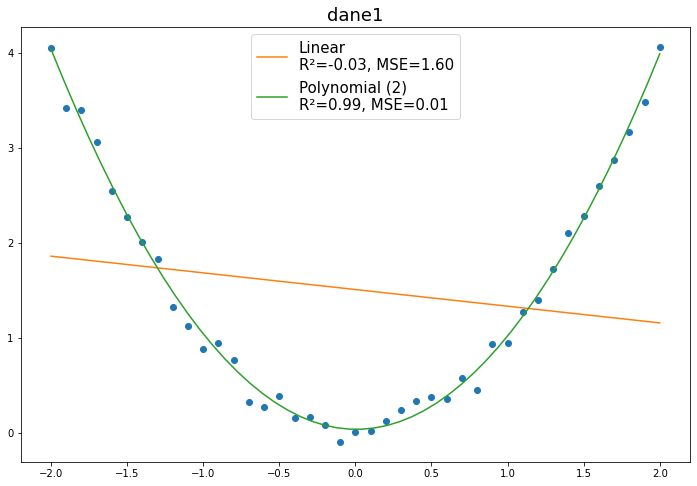

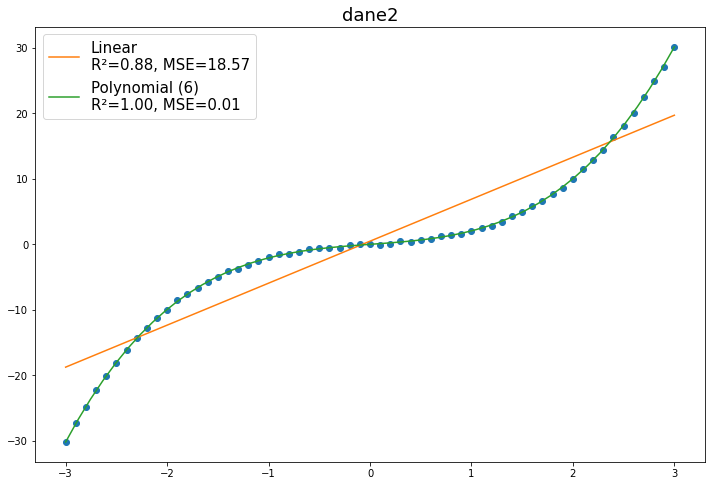

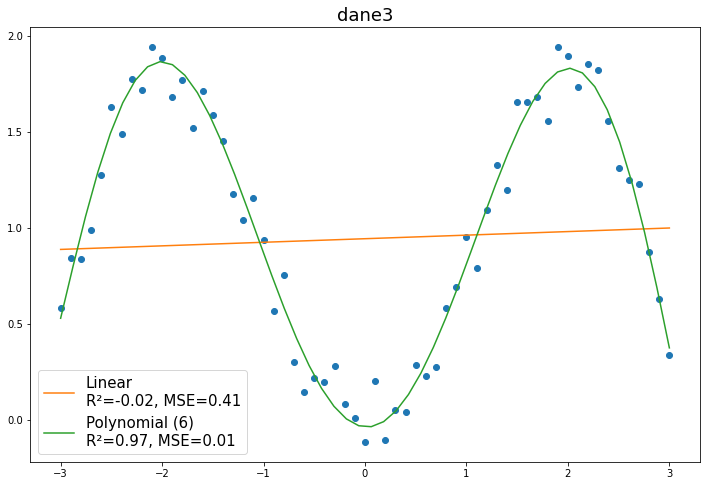

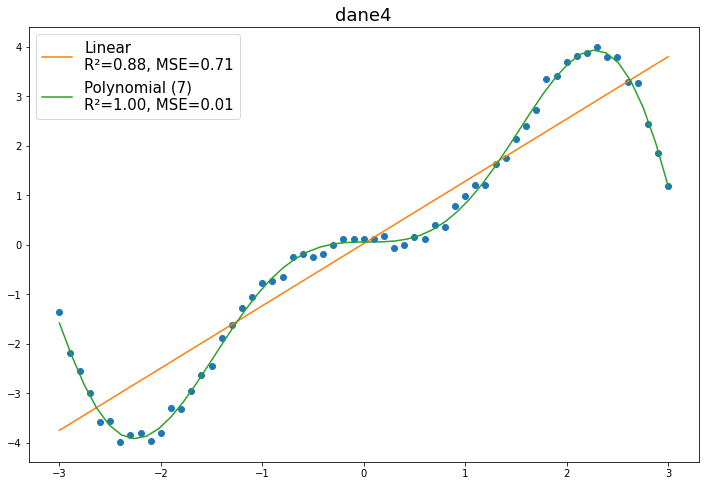

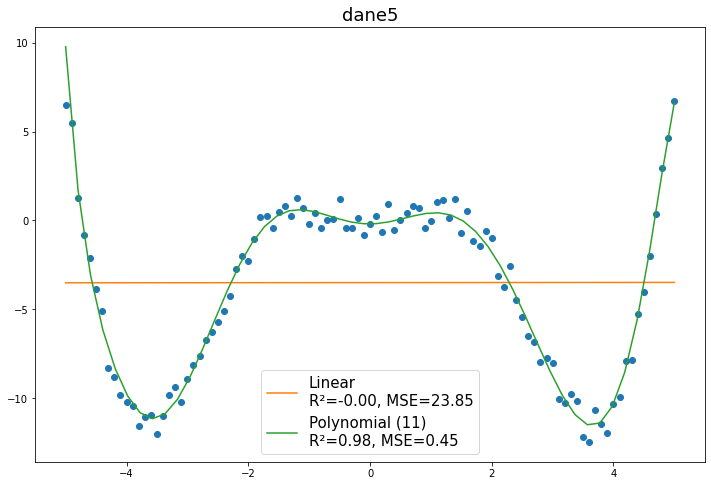

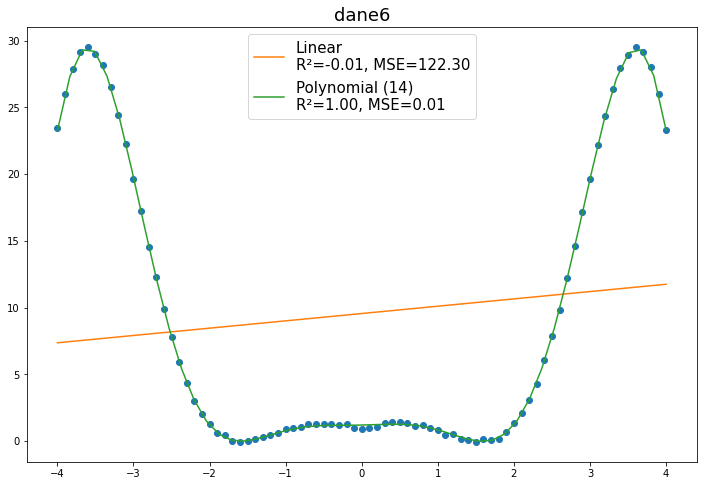

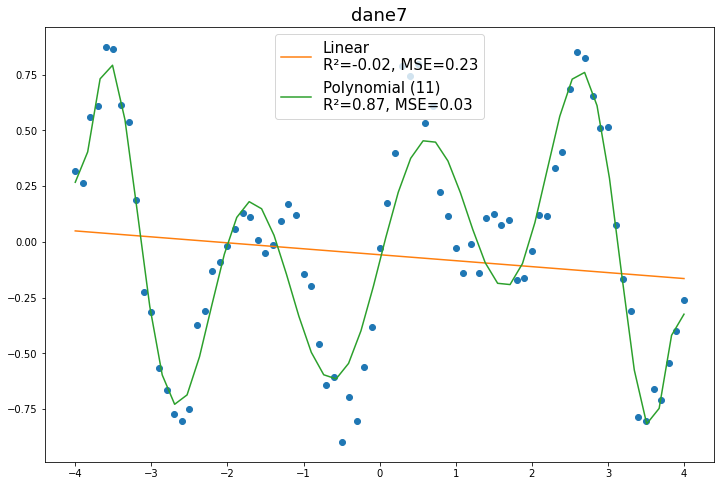

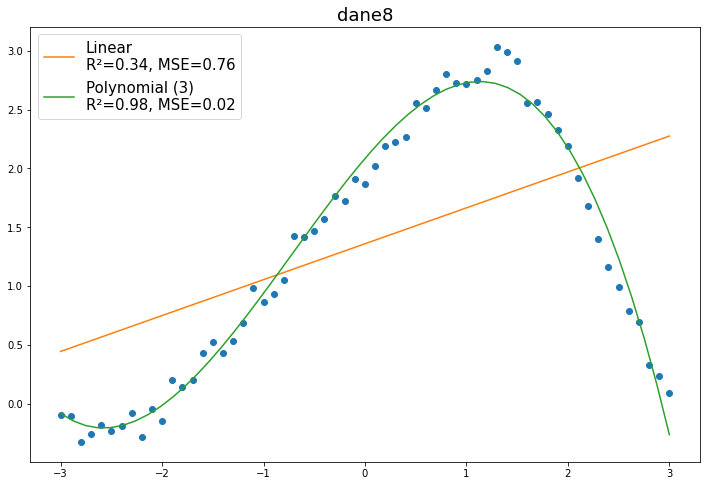

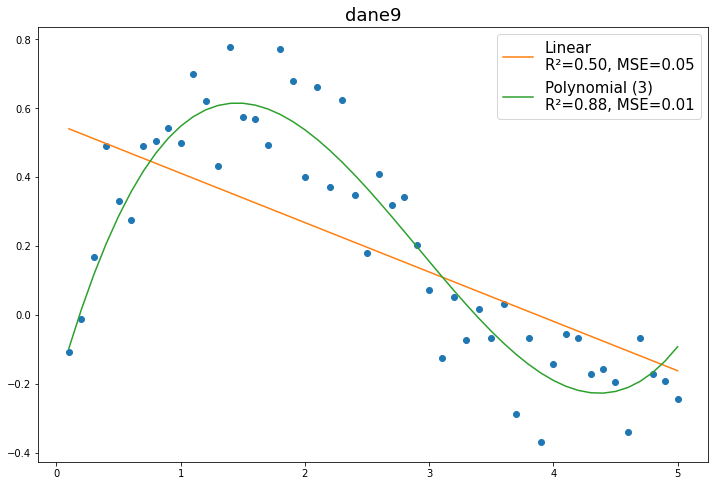

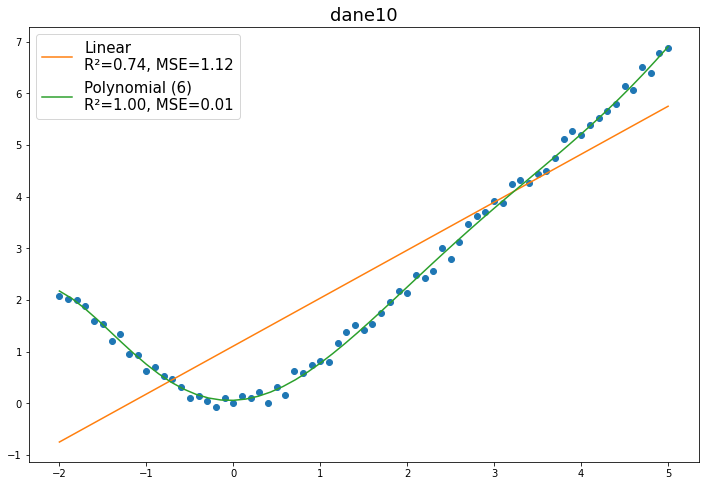

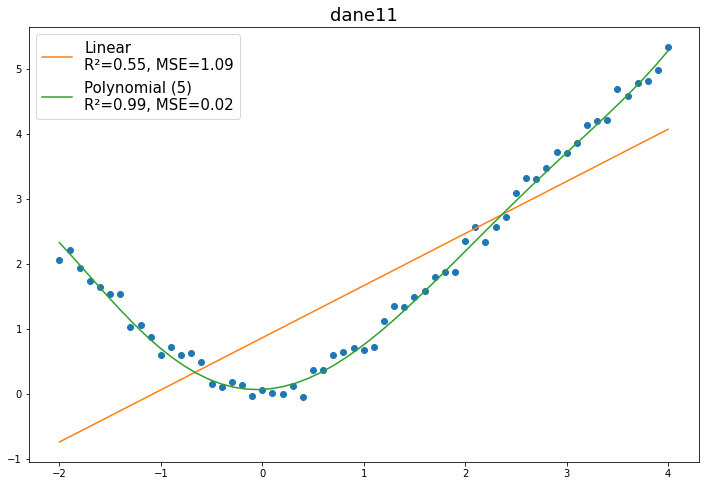

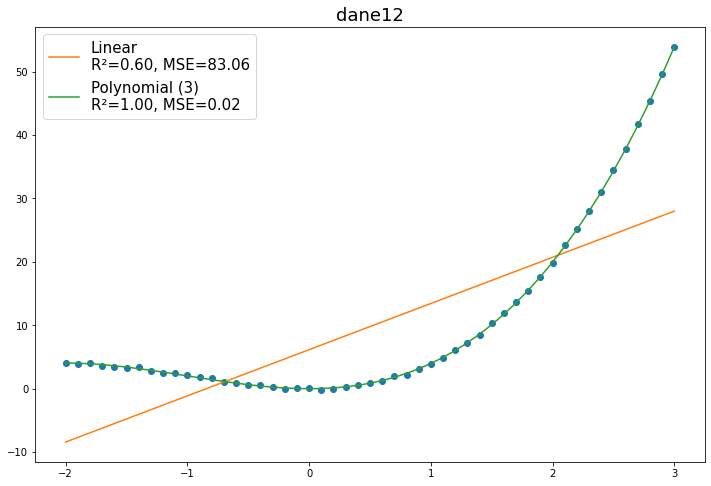

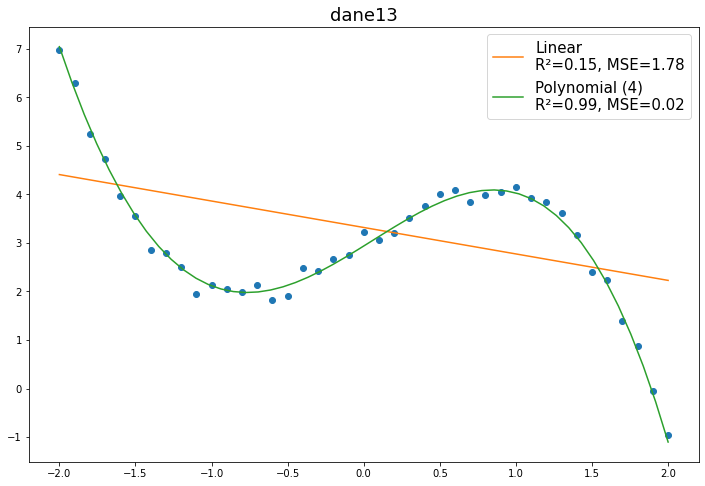

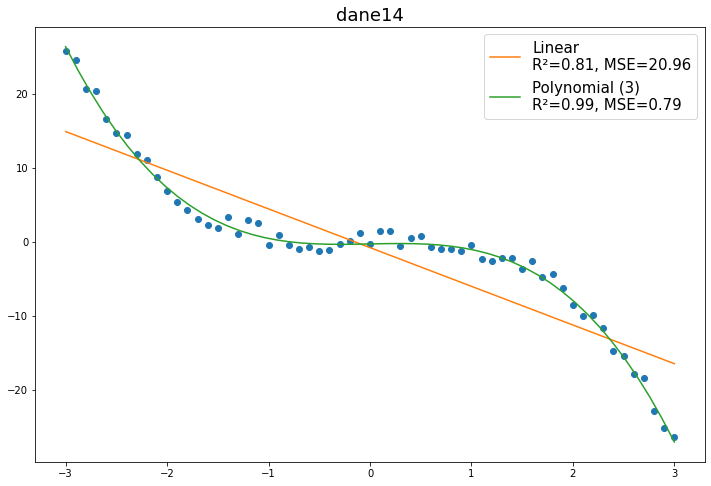

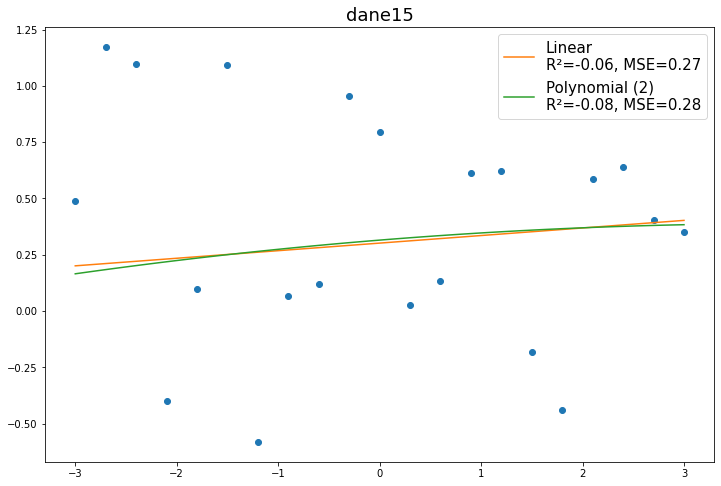

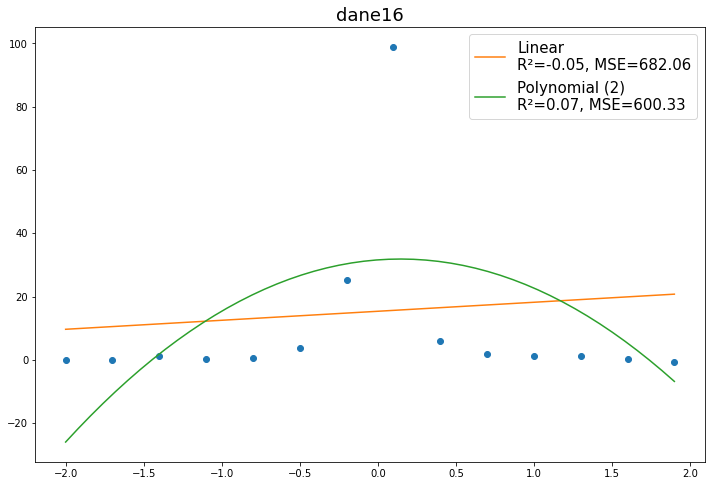

In [2]:
import warnings
warnings.simplefilter('ignore')

data_files = os.listdir('data')

for file in sorted(data_files, key=lambda x: int(x[4:-4])):
    plt.figure(figsize=(12, 8))
    X, y = np.genfromtxt(f'data/{file}', delimiter=' ', unpack=True)
    X, y = X.reshape(-1, 1), y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # simple linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # polynomial regression
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])
    param_grid = {'poly__degree': range(2, 20)}
    polynomial_model = GridSearchCV(pipeline, param_grid)
    polynomial_model.fit(X_train, y_train)

    # plot regression lines
    x_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
    y_plot = linear_model.predict(x_plot)
    y_plot2 = polynomial_model.predict(x_plot)

    # metrics
    r2_lin = linear_model.score(X, y)
    r2_poly = polynomial_model.score(X, y)
    mse_lin = mean_squared_error(y, linear_model.predict(X))
    mse_poly = mean_squared_error(y, polynomial_model.predict(X))
    degree = polynomial_model.best_params_["poly__degree"]

    plt.plot(X, y, 'o')
    plt.plot(x_plot, y_plot,
             label=f'Linear\n'
                   f'R\N{SUPERSCRIPT TWO}={r2_lin:.2f}, MSE={mse_lin:.2f}')
    plt.plot(x_plot, y_plot2,
             label=f'Polynomial ({degree})\n'
                   f'R\N{SUPERSCRIPT TWO}={r2_poly:.2f}, MSE={mse_poly:.2f}')
    plt.legend(fontsize='15')
    plt.title(file.replace('.txt', ''), fontsize='18')

plt.show()